# Exercise 03
Hao-Tien Kuo

## Section 1: Sample Size

In [1]:
from numpy.random import seed
from numpy.random import normal

seed(205)

# x1: 5 observations from a random normal distribution with a mean of 15 and standard deviation of 2
x1 = normal(loc=15, scale=2, size=5)

# x2: 25 observations from a random normal distribution with a mean of 15 and standard deviation of 2
x2 = normal(loc=15, scale=2, size=25)

# x3: 125 observations from a random normal distribution with a mean of 15 and standard deviation of 2
x3 = normal(loc=15, scale=2, size=125)

# x4: 625 observations from a random normal distribution with a mean of 15 and standard deviation of 2
x4 = normal(loc=15, scale=2, size=625)

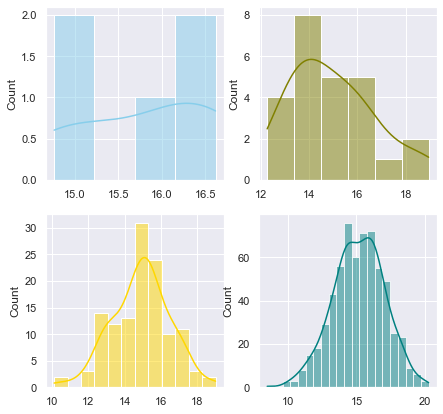

In [2]:
# Use subplots to display the histograms of all four sets of numbers.

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.histplot(data=x1, kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=x2, kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=x3, kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=x4, kde=True, color="teal", ax=axs[1, 1])

plt.show()

In [3]:
# Compute the sample means, standard deviations, and standard errors of x1, x2, x3, & x4.

import numpy as np
import statistics

def get_stat(i):
    mean = statistics.mean(i)
    sd = statistics.stdev(i)
    se = np.std(i, ddof=1) / np.sqrt(np.size(i))
    print('Mean: %.3f \nStandard deviation: %.3f \nStandard error: %.3f \n' %(mean, sd, se))
    
get_stat(x1)
get_stat(x2)
get_stat(x3)
get_stat(x4)

# The larger the sample size, the closer we get to the default mean and standard deviation.
# The larger the sample size, the smaller the standard error.

Mean: 15.805 
Standard deviation: 0.813 
Standard error: 0.364 

Mean: 14.973 
Standard deviation: 1.739 
Standard error: 0.348 

Mean: 14.897 
Standard deviation: 1.585 
Standard error: 0.142 

Mean: 15.163 
Standard deviation: 1.901 
Standard error: 0.076 



## Section 2: Poisson Distribution

In [28]:
# generate a Poisson distribution setting lam=10 and size=1000

from numpy.random import poisson
seed(141)

x5 = poisson(lam=10, size=1000)

In [29]:
# Compute mean and variance of your 1000 random Poisson values

print("Mean:", statistics.mean(x5))
print("Variance:", statistics.variance(x5))

# lambda, mean, and variance are equal

Mean: 10
Variance: 10


In [30]:
# generate a Poisson distribution setting lam=10 and size=5

seed(141)

x6 = poisson(lam=10, size=5)
print("Mean:", statistics.mean(x6))
print("Variance:", statistics.variance(x6))

# lambda, mean, and variance are not that close

Mean: 12
Variance: 3


## Section 3: Analysis

In [7]:
import psycopg2
import pandas as pd

conn = psycopg2.connect(host="localhost", database="dvdrental", user="postgres", password="password")
cur = conn.cursor()

In [31]:
df_dvd = pd.read_sql_query("""
    with b4 as (
        select p.customer_id, sum(p.amount) as Payment_before
        from rental r left outer join payment p on p.rental_id = r.rental_id 
        where rental_date < cast('2005-07-29' as timestamp) and amount is not null
        group by p.customer_id),
    aft as (
        select p.customer_id, sum(p.amount) as Payment_after 
        from rental r left outer join payment p on p.rental_id = r.rental_id 
        where rental_date >= cast('2005-07-29' as timestamp) and amount is not null
        group by p.customer_id)

    select distinct c.customer_id, store_id, first_name, last_name, active, payment_before, payment_after 
    from customer c left outer join b4 r on r.customer_id = c.customer_id 
        left outer join aft a on a.customer_id = c.customer_id
    where payment_after is not null and payment_before is not null
    ;""", con = conn)

cur.close()
conn.close()

df_dvd

,customer_id,store_id,first_name,last_name,active,payment_before,payment_after
0,89,1,Julia,Flores,1,86.83,37.88
1,423,2,Alfred,Casillas,1,73.84,46.90
2,351,1,Jack,Foust,1,46.87,40.90
3,349,2,Joe,Gilliland,1,51.88,81.84
4,62,1,Joan,Cooper,1,35.90,42.89
...,...,...,...,...,...,...,...
594,399,1,Danny,Isom,1,30.92,42.90
595,454,2,Alex,Gresham,1,79.84,63.84
596,529,2,Erik,Guillen,1,42.88,72.84
597,107,1,Florence,Woods,1,78.82,35.90


In [32]:
# Compute summary statistics and create histograms of the payment_before and payment_after variables. 

df_dvd[['payment_before', 'payment_after']].describe()

,payment_before,payment_after
count,599.000000,599.000000
mean,47.240835,55.116494
std,16.371236,18.066741
min,5.960000,4.980000
25%,34.935000,42.890000
50%,45.900000,53.880000
75%,57.865000,65.860000
max,108.760000,127.730000


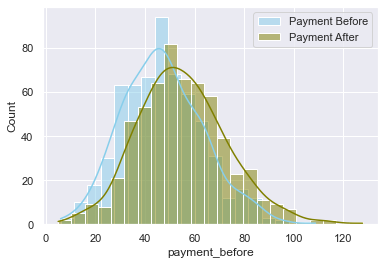

In [33]:
sns.histplot(data=df_dvd['payment_before'], kde=True, color="skyblue", label='Payment Before')
sns.histplot(data=df_dvd['payment_after'], kde=True, color="olive", label='Payment After')
plt.legend()
plt.show()

In [39]:
# Compute the correlation between these two variables and create a scatterplot

np.corrcoef(df_dvd['payment_before'], df_dvd['payment_after'])[0,1]
# correlation is around 0.07

0.07139783756138555

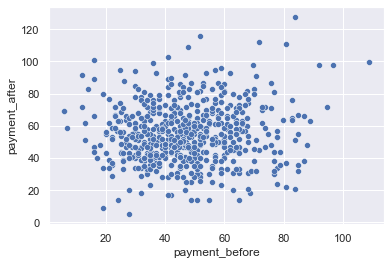

In [40]:
sns.scatterplot(data=df_dvd, x='payment_before', y='payment_after')
plt.show()

In [41]:
# Compute a variable which is the difference between the amounts spent before and after the program started

df_dvd['diff'] = df_dvd['payment_after'] - df_dvd['payment_before']

df_dvd.head()

,customer_id,store_id,first_name,last_name,active,payment_before,payment_after,diff
0,89,1,Julia,Flores,1,86.83,37.88,-48.95
1,423,2,Alfred,Casillas,1,73.84,46.90,-26.94
2,351,1,Jack,Foust,1,46.87,40.90,-5.97
3,349,2,Joe,Gilliland,1,51.88,81.84,29.96
4,62,1,Joan,Cooper,1,35.90,42.89,6.99


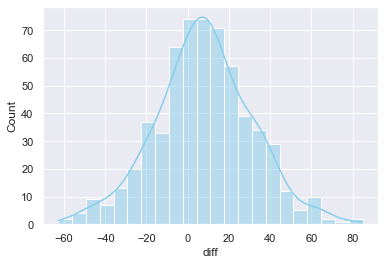

In [42]:
# Generate a histogram of the difference and conduct a one-sample t-test.

sns.histplot(data=df_dvd['diff'], kde=True, color="skyblue")
plt.show()

In [43]:
import scipy.stats as stats

# perform one sample t-test
stats.ttest_1samp(a=df_dvd['diff'], popmean=0)

Ttest_1sampResult(statistic=8.202692282398393, pvalue=1.4429447558303775e-15)

In [ ]:
# Interpret your results:

# H0: The difference between payments before and after the program is not different from zero
# HA: The difference above is greater than zero (one-tailed t-test)
# alpha = 0.05

# Since the p-value we obtained is far less than 0.05, we can reject the null hypothesis 
# and conclude that the spending habits before and after the promotion differ.